In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn

# Definitions (any d)

In [15]:
def u(X, X0,sigma):
    X = np.array(X)
    X0 = np.array(X0) 
    return 1. - np.exp(-np.linalg.norm(X-X0)**2/2/sigma)

In [16]:
def U(X,A_list,Sigma_list):
    p = np.prod(
    [u(X,A_list[i],Sigma_list[i]) for i in range(len(A_list))]
    )
    return p 


$$
\vec\nabla U(x) = 
\sum_{i=1}^{r} \left(  \prod_{j\neq i=1}^{r} u^{(j)}(x)   \right) 
\vec\nabla u^{(i)}(x)
$$

with

$$
\vec\nabla u^{(i)}(x) = 
-\frac{1}{\sigma^2} [u^{(i)}(x)-1] (\vec{x}-\vec{a}^{(i)})
$$

In [17]:
def Ugrad (X,A_list,Sigma_list):
   
    d = len(X)
    r = len(A_list)
    
    Ugrad = np.array([0. for i in range(d)])

    for i in range(r):
    
        fact1 = -pow(Sigma_list[i],-2)
        fact2 = u(X, A_list[i],Sigma_list[i])-1
        vec = np.array(X) - np.array(A_list[i])
        grad_i = fact1*fact2*vec

        jlist = [j for j in range(r) if j != i]    
        prod_i = np.prod([ u(X, A_list[j],Sigma_list[j]) for j in jlist])
    
        Ugrad = Ugrad + prod_i * grad_i
    
    return Ugrad

# Runs (hardcoded in d = 2, 3)

In [18]:
#Example:

X = [-1,0]

A0 = [0,0]
A1 = [-2,3]
A2 = [-2,-1]

A_list = np.array([A0,A1,A2])

sigma0, sigma1, sigma2 = 1, 1, .5

Sigma_list = np.array([sigma0, sigma1, sigma2])

print(U(X,A_list,Sigma_list))
print(Ugrad(X,A_list,Sigma_list))

0.337926677709438
[-0.30705365  0.20468881]


In [19]:
#select random positions in 2D

m = 1000
x1min, x1max = -4 , 4
x2min, x2max = -4 , 4

X = np.array([[rn.uniform(x1min, x1max),rn.uniform(x2min, x2max)] for i in range(m)])

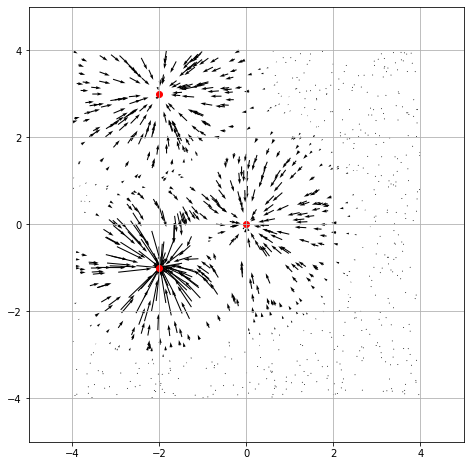

In [20]:
plt.rcParams["figure.figsize"] = (8,8)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Vector origin location
X0 = X[:,0]
X1 = X[:,1]
  
# gradients
grad_list = np.array([Ugrad(X[k],A_list,Sigma_list) for k in range(m)])
G0 = -grad_list[:,0]
G1 = -grad_list[:,1]



# Creating plot
plt.quiver(X0, X1, G0, G1, color='k', units='xy', scale=2)

#Attractors
plt.scatter(A_list[:,0],A_list[:,1],c='r')

# x-lim and y-lim
plt.xlim(-5,5)
plt.ylim(-5,5)
  
# Show plot with grid
plt.grid()
plt.show()

In [37]:
# Choose the attractors
A0 = [0,0,0]
A1 = [1,1,0]
A2 = [2,2,2]
A_list = np.array([A0,A1,A2])

sigma0, sigma1, sigma2 = 1, 1, 1
Sigma_list = np.array([sigma0, sigma1, sigma2])

#select random positions in 3D

m = 1000
x0min, x0max = -4 , 4
x1min, x1max = -4 , 4
x2min, x2max = -4 , 4

X = np.array([[
    rn.uniform(x0min, x0max),
    rn.uniform(x1min, x1max),
    rn.uniform(x2min, x2max)] for i in range(m)])

In [ ]:
# pinning: x2 = 2 
# trying to selct A2 with [x1,x2]= [2,2]

In [33]:
def U_2D(X,A_list,Sigma_list,x2pinned):
    for x in X:
        x[2] = x2pinned
    return U(X,A_list,Sigma_list,x2pinned)

In [39]:
# Choose the attractors
A0 = [0,0,0]
A1 = [1,1,0]
A2 = [2,2,2]
A_list = np.array([A0,A1,A2])

sigma0, sigma1, sigma2 = 1, 1, 1
Sigma_list = np.array([sigma0, sigma1, sigma2])

X = [1,1,1]

U(X,A_list,Sigma_list)

0.2374692714092777